<a href="https://colab.research.google.com/github/lais-santiago/FIAP_TechChallenge4/blob/main/tratamento_machine_learning/Tech_Challenge_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importação de bibliotecas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#2. Importação do arquivo com preços por barril de petróleo bruto Brent (FOB)

In [41]:
df = pd.read_csv('/content/ipeadata.csv', sep=';')
df.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
0,20/05/1987,"18,63",NaN
1,21/05/1987,"18,45",NaN
2,22/05/1987,"18,55",NaN
3,23/05/1987,NaN,NaN
4,24/05/1987,NaN,NaN


#3. Pré-processamento do dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13692 entries, 0 to 13691
Data columns (total 3 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Data                                                                                                     13692 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366  11298 non-null  object 
 2   Unnamed: 2                                                                                               0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 321.0+ KB


In [43]:
# Removendo a última coluna
df = df.drop(columns=['Unnamed: 2'])
df.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366
0,20/05/1987,"18,63"
1,21/05/1987,"18,45"
2,22/05/1987,"18,55"
3,23/05/1987,NaN
4,24/05/1987,NaN


In [44]:
# renomeando as colunas
df = df.rename(columns={'Data': 'data', 'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366': 'preco'})
df.head()

,data,preco
0,20/05/1987,"18,63"
1,21/05/1987,"18,45"
2,22/05/1987,"18,55"
3,23/05/1987,NaN
4,24/05/1987,NaN


In [45]:
# removendo valores nulos
df = df.dropna()
df.head()

,data,preco
0,20/05/1987,"18,63"
1,21/05/1987,"18,45"
2,22/05/1987,"18,55"
5,25/05/1987,"18,6"
6,26/05/1987,"18,63"


In [46]:
# convertendo a coluna data em datetime
df['data'] = pd.to_datetime(df['data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11298 entries, 0 to 13691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    11298 non-null  datetime64[ns]
 1   preco   11298 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 522.8+ KB


<ipython-input-46-6332682df563>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data'])


In [47]:
# convertendo a coluna preco para float
df['preco'] = df['preco'].str.replace(',', '.').astype(float)
df.head()

,data,preco
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11298 entries, 0 to 13691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    11298 non-null  datetime64[ns]
 1   preco   11298 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 522.8 KB


In [49]:
# criando coluna com mes
df['mes'] = df['data'].dt.month
df.head()

,data,preco,mes
0,1987-05-20,18.63,5
1,1987-05-21,18.45,5
2,1987-05-22,18.55,5
5,1987-05-25,18.60,5
6,1987-05-26,18.63,5


In [50]:
# criando coluna com ano
df['ano'] = df['data'].dt.year
df.head()

,data,preco,mes,ano
0,1987-05-20,18.63,5,1987
1,1987-05-21,18.45,5,1987
2,1987-05-22,18.55,5,1987
5,1987-05-25,18.60,5,1987
6,1987-05-26,18.63,5,1987


#4. Análise Exploratória dos dados

##4.1. Resumo Estatístico

In [51]:
df.describe()

,data,preco,mes,ano
count,11298,11298.000000,11298.000000,11298.000000
mean,2006-10-21 08:07:38.842273024,53.323291,6.538502,2006.303594
min,1987-05-20 00:00:00,9.100000,1.000000,1987.000000
25%,1998-07-03 18:00:00,20.630000,4.000000,1998.000000
50%,2007-05-30 12:00:00,48.920000,7.000000,2007.000000
75%,2015-03-27 18:00:00,76.800000,9.750000,2015.000000
max,2024-11-12 00:00:00,143.950000,12.000000,2024.000000
std,NaN,33.159540,3.422685,10.247882


O valor mais baixo do barril de petróleo brent foi registrado em 20/05/1987 a US$ 9,10.

Enquanto que o valor mais alto registrado é o atual de US$ 143,95, registrado em 12/11/2024.

Pelos valores de mínimo, máximo, 25%, 50% e 75% o valor do barril de petróleo brent sofreu uma alta constante ao longo dos anos.

##4.2. Verificando as distribuições

In [52]:
df.head()

,data,preco,mes,ano
0,1987-05-20,18.63,5,1987
1,1987-05-21,18.45,5,1987
2,1987-05-22,18.55,5,1987
5,1987-05-25,18.60,5,1987
6,1987-05-26,18.63,5,1987


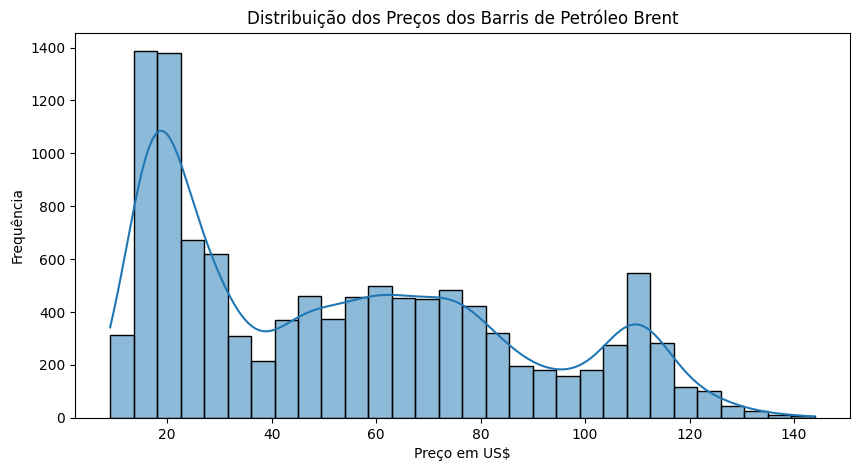

In [53]:
# Histograma do preço
plt.figure(figsize=(10, 5))
sns.histplot(df['preco'], kde=True, bins=30)
plt.title('Distribuição dos Preços dos Barris de Petróleo Brent')
plt.xlabel('Preço em US$')
plt.ylabel('Frequência')
plt.show()

Ao longo do período analisado (de 04/01/1986 a 12/11/2024), preços em torno de US$ 20 tiveram a maior frequência (em torno de 1400 ocorrências).

Enquanto que o valor de mais de US$ 140 que foi registrado em novembro de 2024 ocorreu pouquíssimas vezes no período analisado.

Pelos valores intermediários US\$ 40 a US\$ 120, que tiveram frequência média de 300 ocorrências, sugere um aumento constante dos preços.

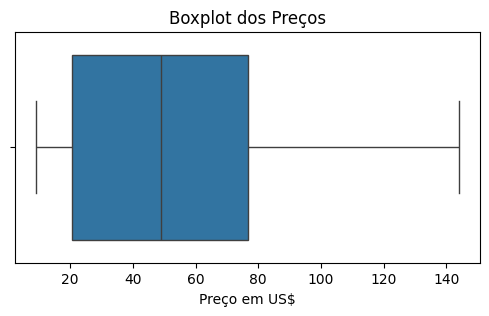

In [54]:
#Checagem de outliers com o boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['preco'])
plt.title('Boxplot dos Preços')
plt.xlabel('Preço em US$')
plt.show()

Pela análise do boxplot o intervalo de valores com maior ocorrência no período analisado é de US\$ 20 a US\$ 80.

Valores acima e abaixo deste intervalo são considerados outliers.

##4.3. Análise Temporal dos preços

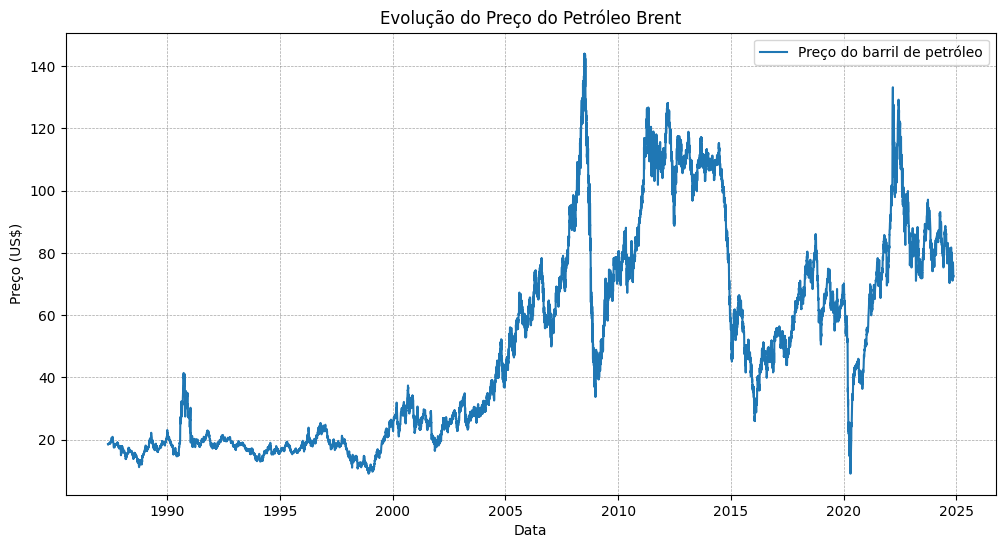

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['preco'], label='Preço do barril de petróleo')
plt.title('Evolução do Preço do Petróleo Brent')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

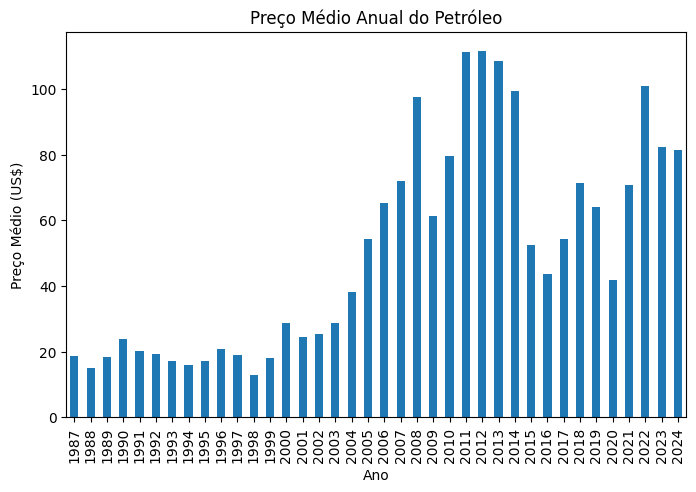

In [56]:
# Preço médio por ano
preco_por_ano = df.groupby('ano')['preco'].mean()

plt.figure(figsize=(8, 5))
preco_por_ano.plot(kind='bar')
plt.title('Preço Médio Anual do Petróleo')
plt.xlabel('Ano')
plt.ylabel('Preço Médio (US$)')
plt.show()

Ao analisar o gráfico acima é possível identificar uma alta constante do preço do barril do petróleo ao longo dos anos, mas com comportamentos singulares nos anos abaixo:


**Entre 2008 e 2009**

> Houve um pico no preço ficando acima de US\$ 140, seguido de uma queda para menos de US\$ 40 o barril. </br >
> Nesse período houve uma crise mundial do petróleo, chegando a afetar a produção de plásticos e produtos químicos. </br >
> A queda no preço do petróleo foi causada por um excesso de oferta, resultado da relutância dos membros da OPEP em reduzir a produção. A OPEP é um cartel formado pelos maiores produtores globais de petróleo, que se reúne para decidir sobre aumentos ou cortes de oferta. </br >
> A transição global da produção de energia proveniente de petróleo para a produção de energias alternativas também reduziu a demanda por petróleo.

**Entre 2014 e 2015**

> Houve uma nova queda no valor do barril de US\$ 120 até pouco menos de US\$ 50. </br >
> O preço do petróleo caiu devido a um aumento na produção, principalmente nos EUA, e a uma demanda menor do que o esperado na Europa e na Ásia.

**De 2020 a 2021**

> O valor do barril sofreu a maior queda, chegando  a menos de US\$ 20, graças a pandemia do vírus COVID. </br >
> A pandemia de coronavírus causou uma queda de 21,5% na cotação do petróleo Brent em 2020. </br >
> O preço do petróleo subiu 41% em 2021, atingindo um recorde em dois anos. O WTI saiu de US\$ 48 por barril no início do ano para perto de US\$ 80 no final. O Brent, outro tipo de petróleo, subiu 57% em 2021. </br >
> A alta do preço do petróleo impactou a economia global e o Brasil, causando:
* Aumento da inflação
* Manutenção dos juros altos por mais tempo
* Impacto nos investimentos de todos os tipos
* Aumento do custo de vida das famílias
* Aumento do custo de produção das indústrias, comércio e serviços
* Desvalorização do real em comparação ao dólar </br >

> O preço do petróleo continuou a subir em 2022, tornando-se um fator de pressão inflacionária no Brasil e no mundo.


Fontes:
* https://brasil.elpais.com/brasil/2015/01/06/actualidad/1420570796_254696.html#:~:text=A%20regi%C3%A3o%20saiu%20rapidamente%20da%20crise%20mundial,consultorias%20e%20bancos%20feita%20pela%20empresa%20FocusEconomics.

* https://investalk.bb.com.br/noticias/quero-aprender/como-o-preco-do-petroleo-afeta-o-dolar-e-vice-versa#:~:text=Um%20dos%20principais%20catalisadores%20dos,de%20acordo%20com%20seus%20interesses.

* https://pt.khanacademy.org/science/ciencias-em-sustentabilidade/x28aee4903b62e337:fontes-de-energia/x28aee4903b62e337:evolucao-do-uso-da-energia/e/intro-to-energy-resources-and-consumption#:~:text=Qual%20das%20afirma%C3%A7%C3%B5es%20a%20seguir,petr%C3%B3leo%20entre%202008%20e%202009?&text=Uma%20transi%C3%A7%C3%A3o%20global%20da%20produ%C3%A7%C3%A3o,reduziu%20a%20demanda%20por%20petr%C3%B3leo.

* https://g1.globo.com/economia/noticia/2015/01/entenda-queda-do-preco-do-petroleo-e-seus-efeitos.html#:~:text=Os%20principais%20apontados%20como%20%22culpados,na%20Europa%20e%20na%20%C3%81sia.

* https://www.udop.com.br/noticia/2021/06/21/preco-do-petroleo-sobe-41-em-2021-e-atinge-recorde-em-2-anos.html

* https://www.cnnbrasil.com.br/economia/macroeconomia/preco-do-petroleo-ja-subiu-60-em-2021-e-ha-quem-aposte-em-mais-aumentos/#:~:text=S%C3%B3%20em%202021%2C%20sua%20alta,%2C%20da%20gasolina%2C%2073%25.

* https://www.cnnbrasil.com.br/economia/mercado/tensao-na-ucrania-pressiona-petroleo-mas-causas-para-alta-ja-existiam-entenda/#:~:text=Macroeconomia-,Tens%C3%A3o%20na%20Ucr%C3%A2nia%20pressiona%20petr%C3%B3leo%2C%20mas,para%20alta%20j%C3%A1%20existiam;%20entenda&text=O%20petr%C3%B3leo%20engatou%20em%202021,2022%20pr%C3%B3ximo%20dos%20US$%20100.

# 5. Desenvolvimento do Modelo de Machine Learning

##5.1. Realizando Featuring Engineering

Para tanto serão adicionados recursos que podem ser úteis para o modelo:
*   **Lag Features:** Preço do petróleo nos dias anteriores.
*   **Média Móvel:** Médias do preço nos últimos n dias.
*   **Sazonalidade:** Variáveis como mês ou dia da semana.
*   **Tendências:** Criação de indicadores de tendência.

In [57]:
# Adicionando Lags
for lag in range(1, 6):  # Lags dos últimos 5 dias
    df[f'preco_lag_{lag}'] = df['preco'].shift(lag)

# Adicionando média móvel de 7 dias
df['media_movel_7d'] = df['preco'].rolling(window=7).mean()

# Adicionando dia da semana (0 = segunda-feira, 6 = domingo)
df['dia_da_semana'] = df['data'].dt.dayofweek

# Removendo valores nulos criados pelas operações acima
df = df.dropna()

df.head()

,data,preco,mes,ano,preco_lag_1,preco_lag_2,preco_lag_3,preco_lag_4,preco_lag_5,media_movel_7d,dia_da_semana
8,1987-05-28,18.60,5,1987,18.60,18.63,18.60,18.55,18.45,18.580000,3
9,1987-05-29,18.58,5,1987,18.60,18.60,18.63,18.60,18.55,18.572857,4
12,1987-06-01,18.65,6,1987,18.58,18.60,18.60,18.63,18.60,18.601429,0
13,1987-06-02,18.68,6,1987,18.65,18.58,18.60,18.60,18.63,18.620000,1
14,1987-06-03,18.75,6,1987,18.68,18.65,18.58,18.60,18.60,18.641429,2


##5.2. Separando dados entre treino e teste

Como se trata de uma série temporal vou separar os dados de treino e teste de forma cronológica. Deixando os dados mais antigos para treino e os mais recentes para teste.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Garantir que os dados estejam ordenados pela data
df = df.sort_values(by='data')

# Definir a proporção para treino e teste: 80% treino, 20% teste
train_size = int(len(df) * 0.8)

# Separar os dados
train = df[:train_size]
test = df[train_size:]

# Exibir tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {len(train)}")
print(f"Tamanho do conjunto de teste: {len(test)}")

Tamanho do conjunto de treino: 9033
Tamanho do conjunto de teste: 2259


## 5.3. Testando Modelos

Como os dados que irei testar são em forma de timeseries, testarei os modelos de Random Forest, Decision Tree e Regressão Linear, que são considerados adequados para esse tipo de dado.

###5.3.1. Criando método de teste de modelo

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
def roda_modelo(modelo, X_train, y_train, X_test, y_test, dados_teste):
    # Treinar o modelo
    modelo.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo.predict(X_test)

    # Avaliar o modelo
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")

    print("Gráfico comparativo de valores reais com os valores previstos")

    # Visualizando os resultados, comparando valores reais com os previstos
    plt.figure(figsize=(10, 6))
    plt.plot(dados_teste, y_test, label='Valores Reais', color='blue')
    plt.plot(dados_teste, y_pred, label='Valores Previstos', color='orange')
    plt.title('Previsão do Preço do Petróleo Brent')
    plt.xlabel('Anos')
    plt.ylabel('Preço (US$)')
    plt.legend()
    plt.show()

### 5.3.2. Preparando dados para os testes

In [62]:
# Definir as features (colunas explicativas) e a variável-alvo
features = [col for col in df.columns if col.startswith('preco_lag') or col == 'media_movel_7d' or col == 'dia_da_semana']
target = 'preco'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

dados_teste = test['data']

###5.3.1 Testando o Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



------------------------------Resultados RandomForestRegressor(random_state=42)------------------------------

MAE (Erro Absoluto Médio): 1.23
RMSE (Raiz do Erro Quadrático Médio): 1.77
Gráfico comparativo de valores reais com os valores previstos


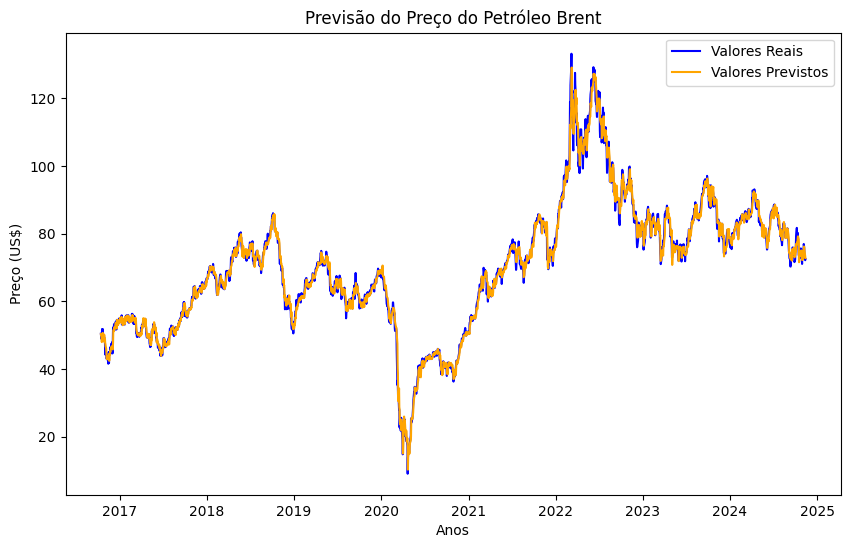

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Criar o modelo
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

roda_modelo(model_random_forest, X_train, y_train, X_test, y_test, dados_teste)

###5.3.2 Testando o Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



------------------------------Resultados DecisionTreeRegressor(random_state=42)------------------------------

MAE (Erro Absoluto Médio): 1.74
RMSE (Raiz do Erro Quadrático Médio): 2.39
Gráfico comparativo de valores reais com os valores previstos


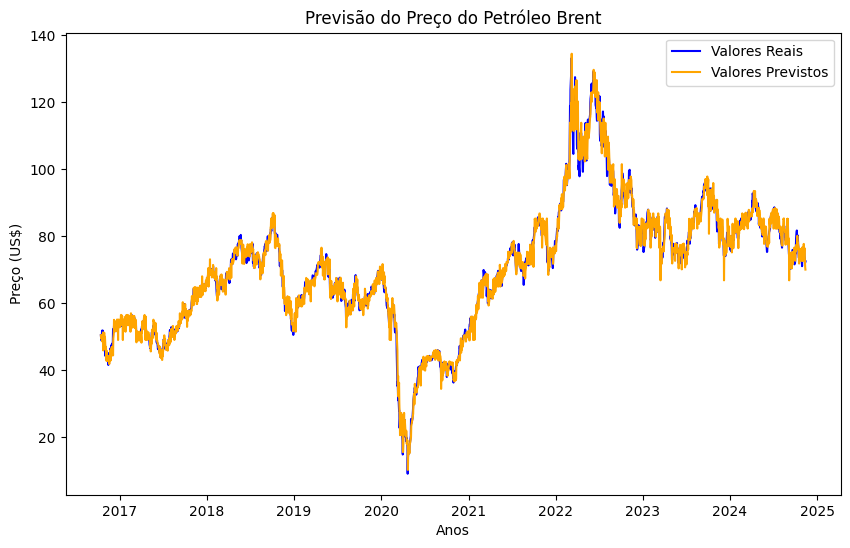

In [64]:
from sklearn.tree import DecisionTreeRegressor

# Criar o modelo
model_decision_tree = DecisionTreeRegressor(random_state=42)

roda_modelo(model_decision_tree, X_train, y_train, X_test, y_test, dados_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



------------------------------Resultados DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)------------------------------

MAE (Erro Absoluto Médio): 1.66
RMSE (Raiz do Erro Quadrático Médio): 2.36
Gráfico comparativo de valores reais com os valores previstos


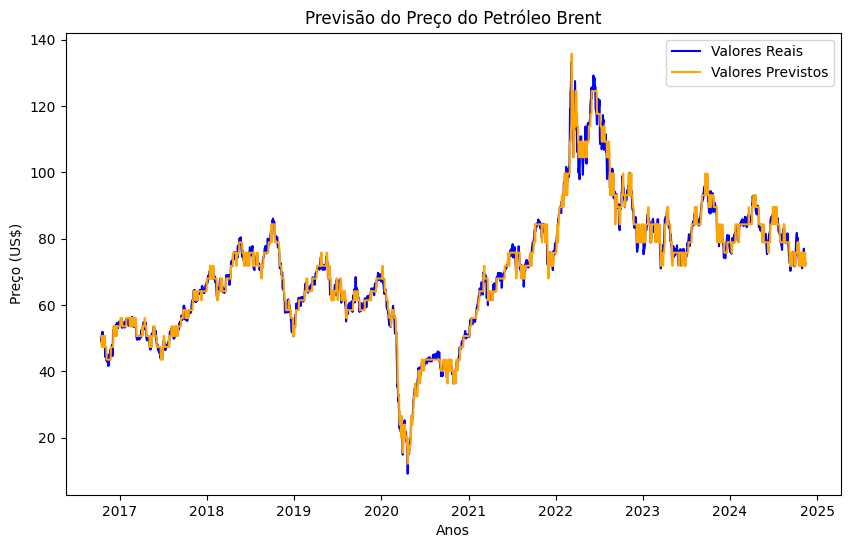

In [65]:
# Ajustando hiperparâmetros
model_decision_tree_2 = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10)

roda_modelo(model_decision_tree_2, X_train, y_train, X_test, y_test, dados_teste)

###5.3.3 Testando a Regressão Linear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



------------------------------Resultados LinearRegression()------------------------------

MAE (Erro Absoluto Médio): 0.87
RMSE (Raiz do Erro Quadrático Médio): 1.23
Gráfico comparativo de valores reais com os valores previstos


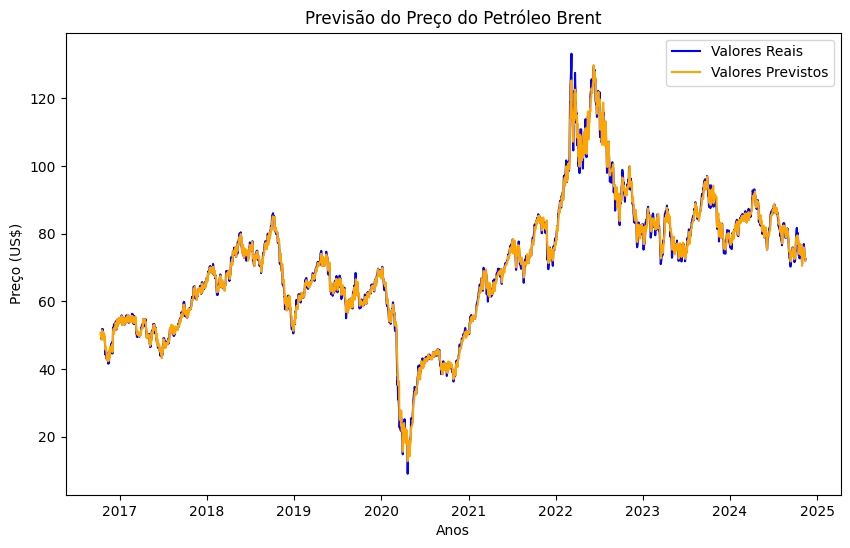

In [66]:
from sklearn.linear_model import LinearRegression

# Instanciar o modelo
model_linear_regression = LinearRegression()

roda_modelo(model_linear_regression, X_train, y_train, X_test, y_test, dados_teste)

##5.4 Conclusão da análise de modelos

Com base nesses resultados:

*   Com MAE de 0.87 e RMSE de 1.23, o modelo de **Regressão Linear** foi o mais preciso e consistente para prever o preço do barril de petróleo bruto. Ele superou os outros modelos, possivelmente devido à natureza linear da relação entre as variáveis no conjunto de dados. Além disso, sua simplicidade o torna uma escolha eficiente e interpretável.

*   O modelo **Random Forest** apresentou MAE de 1.23 e RMSE de 1.77, mostrando um desempenho razoável, mas inferior ao da Regressão Linear. O modelo Random Forest pode ter capturado interações mais complexas entre as variáveis, mas essas interações não foram suficientes para superar a performance da Regressão Linear no conjunto de teste.

*   Com MAE de 1.66 e RMSE de 2.36, o modelo **Decision Tree** foi o menos eficaz. Seus altos valores de erro sugerem que ele pode ter sofrido de overfitting no conjunto de treino ou não conseguiu capturar adequadamente a estrutura dos dados. Este modelo seria o menos indicado para essa tarefa.

#6. Exportação do modelo

In [67]:
import joblib

In [68]:
joblib.dump(model_linear_regression, 'linear_regression.joblib ')

['linear_regression.joblib']